In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from preprocessor import load_encoder,load_feature_cleaner

In [4]:
from utils import getMissingDataFeatures,getNullPercentage,dropFeaturesWithNulls,getCatFeatures,getCatFeaturesWithNulls,fillNAwithBlank
from utils import formulateCondition,conditionBasedImputation

In [19]:
test_set=pd.read_csv('data/test.csv')

In [20]:
test_set.shape

(1459, 80)

In [21]:
test_set.drop(columns=['Id'],inplace=True)

In [8]:
test_set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [37]:
df2=test_set[['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','GarageCars','GarageArea']]

In [27]:
train_set=pd.read_csv('data/train.csv')

In [28]:
train_set.shape

(1460, 81)

In [34]:
df=train_set[['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','GarageCars','GarageArea','SalePrice']]

In [38]:
df.describe()

,BsmtHalfBath,BsmtFullBath,BsmtFinSF1,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.057534,0.425342,443.639726,1.767123,472.980137,180921.195890
std,0.238753,0.518911,456.098091,0.747315,213.804841,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,0.000000,1.000000,334.500000,129975.000000
50%,0.000000,0.000000,383.500000,2.000000,480.000000,163000.000000
75%,0.000000,1.000000,712.250000,2.000000,576.000000,214000.000000
max,2.000000,3.000000,5644.000000,4.000000,1418.000000,755000.000000


In [39]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [41]:
df.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [42]:
df.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [45]:
df.GarageArea.value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [53]:
df.mode()

,BsmtHalfBath,BsmtFullBath,BsmtFinSF1,GarageCars,GarageArea,SalePrice
0,0,0,0,2,0,140000


/home/ravikumar/Desktop/pythonista/gl/hackathon/hackathon2/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

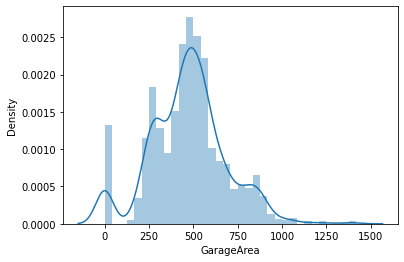

In [51]:
sns.distplot(df.GarageArea)

In [46]:
df.BsmtFinSF1.value_counts()

0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

/home/ravikumar/Desktop/pythonista/gl/hackathon/hackathon2/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

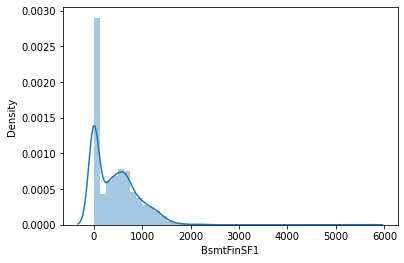

In [52]:
sns.distplot(df.BsmtFinSF1)

In [54]:
df.median()

BsmtHalfBath         0.0
BsmtFullBath         0.0
BsmtFinSF1         383.5
GarageCars           2.0
GarageArea         480.0
SalePrice       163000.0
dtype: float64

In [22]:
def preprocess_data(X):
    cleanup_pipeline=load_feature_cleaner()
    encode_pipeline=load_encoder()
    X=cleanup_pipeline.transform(X)
    X=encode_pipeline.transform(X)
    return X

In [23]:
X_test=preprocess_data(test_set)

In [24]:
X_test.shape

(1432, 98)

In [29]:
pd.Series(X_test.isna().sum()).sort_values(ascending=False)[:10]

Neighborhood_Veenker    0
BsmtQual                0
BsmtExposure            0
BsmtFinType1            0
BsmtFinSF1              0
BsmtFinType2            0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
Heating                 0
dtype: int64

In [13]:
X_test.fillna(value=X_test.mode()[['BsmtHalfBath']], inplace=True)

In [28]:
X_test.dropna(how='any',axis=0,inplace=True)

In [30]:
X_test.shape

(1429, 98)